# ARIMA

**short-time forecasts (ie <= 6 periods)**

### Get a Time Series to analyze

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
import random
%matplotlib inline

df = sns.load_dataset('flights')

## ARIMA models require the data to be stationary

1. Non-seasonal
2. Without a trend

**We want to exclude autocorrelation**. We call a non-autocorrelated time series **stationary**.

### Autocorrelation
correlation for each time shift -> ACF plot

if the ACF plot drops quickly to near-zero, you have neither a trend nor seasonality

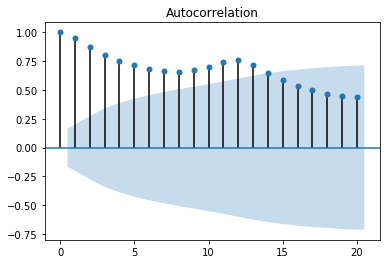

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['passengers'], lags=20)
None

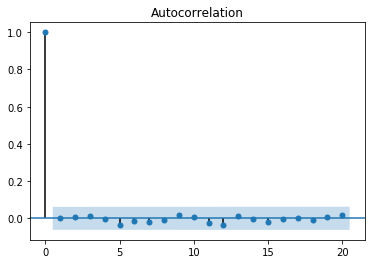

In [3]:
import numpy as np

a = np.random.normal(size=1000)
walk = np.cumsum(a)

plot_acf(a, lags=20)
None

### Autoregressive Model

p - hyperparameter: how many periods we look into the past

AR(p):

$y_t = c + a_1 y_{t-1} + a_2 y_{t-2} .. + a_p y_{t-p} + \epsilon_t$

In [23]:
# generate data (200 periods) using an AR(2) process
# with parameters: c= 8, w1= 1.3, w2=-0.7
random.seed(42)

data = [20.0, 20.0]
c = 8.0
a1 = 1.3
a2 = -0.7

for i in range(198):
    yt = c + (a1*data[-1]) + (a2*data[-2]) + random.gauss(mu=0.0, sigma=1.0)
    data.append(yt)

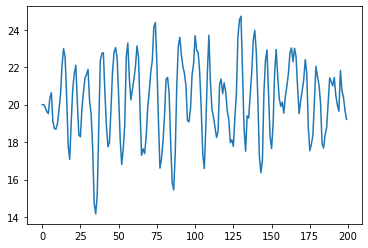

In [24]:
plt.plot(range(200), data)

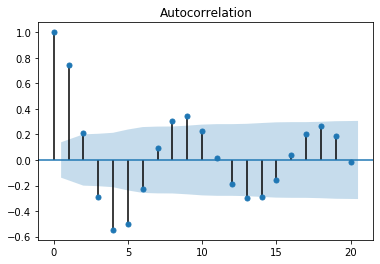

In [25]:
plot_acf(data, lags=20)
None

### Initialize and fit an ARIMA model

also see: Seasonal Arima (SARIMAX)

In [26]:
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [27]:
ytrain = data[:150] # different from sklearn train_test_split
ytest = data[150:]  # test set is always the last part of your data

In [97]:
# (ar, d, ma) <- Order of the ARIMA model
#                (usually small numbers)
# ar - autoregressive part (0 to 3)
#  d - differencing (0 or 1)
# ma - moving average part (Moving Average of the residuals!!, 0 to 3)
m = ARIMA(ytrain, (2, 0, 0))
m.initialize()
r = m.fit()

In [98]:
r.params

array([20.18276786,  1.3234629 , -0.77400587])

In [99]:
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  150
Model:                     ARMA(2, 0)   Log Likelihood                -201.373
Method:                       css-mle   S.D. of innovations              0.918
Date:                Wed, 29 Apr 2020   AIC                            410.745
Time:                        14:32:15   BIC                            422.788
Sample:                             0   HQIC                           415.638
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1828      0.167    120.862      0.000      19.855      20.510
ar.L1.y        1.3235      0.051     25.997      0.000       1.224       1.423
ar.L2.y       -0.7740      0.050    -15.375      0.000      -0.873      -0.675
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8549           -0.7490j            1.1367           -0.1145
AR.2            0.8549           +0.7490j            1.1367            0.1145
-----------------------------------------------------------------------------
"""

In [100]:
# prediction for future periods (xtest)
ypred, err, conf = r.forecast(steps=50) # predicted, error, confidence
ypred.shape

(50,)

In [113]:
fc= []
for i in range(50):
    #reinitialize the model
    ytrain = data[:150+i]
    m = ARIMA(ytrain, (2, 0, 0))
    m.initialize()
    r = m.fit()
    #do a forecast 5 periods ahead
    #collect the last forecasted point
    ypred, err, conf = r.forecast(steps=1)
    fc.append(ypred[-1])
    

In [114]:
ytrain=data[:150]

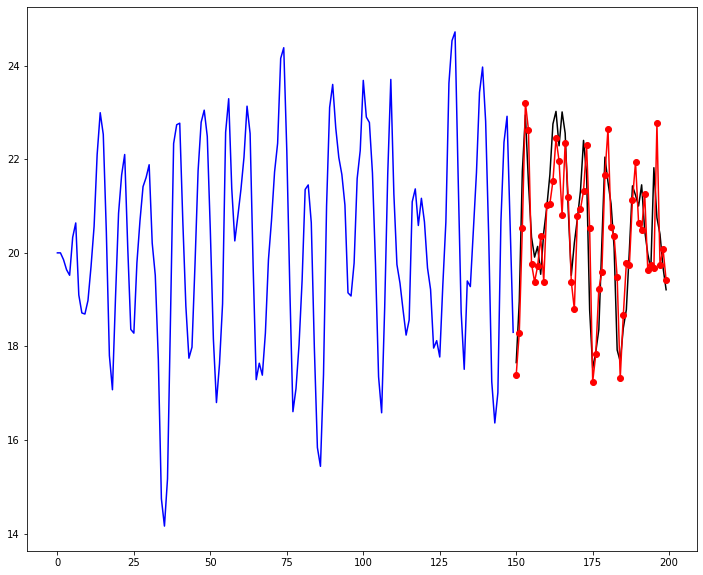

In [116]:
plt.figure(figsize=(12, 10))
plt.plot(range(150), ytrain, color='blue')
plt.plot(range(150, 200), ytest, color='black')
plt.plot(range(150, 200), fc, color='red', marker='o')